In [2]:
!pwd

/home/ericdill/dev/jdm/crystal-video/sydney


In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from tqdm.notebook import trange, tqdm
import textwrap

vid = cv2.VideoCapture('../data/3_58_-65_02-02-2022_00000000.mov')


In [4]:
fps = int(vid.get(cv2.CAP_PROP_FPS))
frame_count = int(vid.get(cv2.CAP_PROP_FRAME_COUNT))
duration = frame_count/fps
print(f"{duration}s, {frame_count} frames, {fps} fps")

w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

print(f"{w} x {h} (w x h)")

748.3s, 7483 frames, 10 fps
1920 x 1080 (w x h)


In [5]:
images_to_store = frame_count // fps

In [6]:
arr = np.zeros((images_to_store+1, h, w), dtype=np.uint8)

ret = True
frame = None
frame_idx = 0
store_idx = 0
print(textwrap.dedent(f"""Storing one image per minute in memory.
This will be {images_to_store} images out of {frame_count} total images"""))

for idx in trange(frame_count-1):
    ret, frame = vid.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    if idx % fps == 0:
        arr[store_idx] = gray
        # print(f"{idx}.",end='')
        store_idx += 1


Storing one image per minute in memory.
This will be 748 images out of 7483 total images


  0%|          | 0/7482 [00:00<?, ?it/s]

In [7]:
store_idx

749

In [8]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


In [12]:
%matplotlib widget

interactive(children=(IntSlider(value=748, description='x', max=748), Output()), _dom_classes=('widget-interac…

<function __main__.<lambda>(x)>

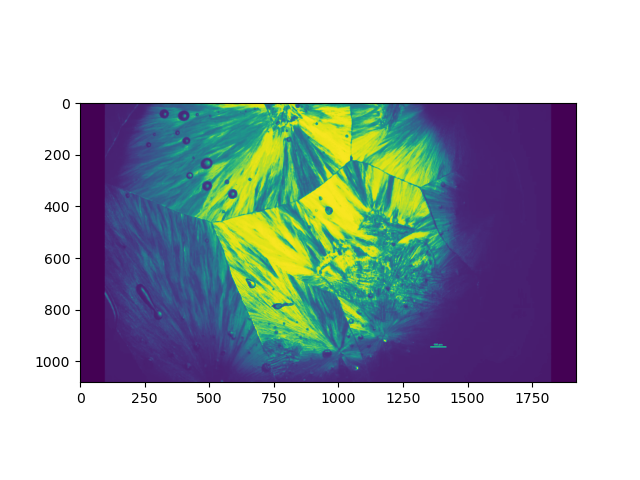

In [13]:
fig, ax = plt.subplots()
plotter2 = lambda x: ax.imshow(arr[x])
slider = widgets.IntSlider(min=0, max=len(arr)-1, step=1, value=len(arr)-1)
interact(plotter2, x=slider)